# Arya.ai

### Importing all necessary libraries 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics as mt


In [2]:
import os 
os.chdir('C:\\Data\\Internship')

train_data= pd.read_csv('training_set.csv')
test_data= pd.read_csv('test_set.csv')

In [3]:
train_data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


### Checking for missing values in the data

In [4]:
train_data.isnull().sum()

test_data.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
X30           0
X31           0
X32           0
X33           0
X34           0
X35           0
X36           0
X37           0
X38           0
X39           0
X40           0
X41           0
X42           0
X43           0
X44           0
X45           0
X46           0
X47           0
X48           0
X49           0
X50           0
X51           0
X52           0
X53           0
X54           0
X55           0
X56           0
X57           0
dtype: int64

### Checking the distribution of the target variable Y

In [5]:
train_data['Y'].value_counts(normalize=True)

0    0.607673
1    0.392327
Name: Y, dtype: float64

We have 60% 0s and only 40% in our dataset.

In [6]:
train_data.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,3909.000000,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [7]:
train_data.dtypes

Unnamed: 0      int64
X1            float64
X2            float64
X3            float64
X4            float64
X5            float64
X6            float64
X7            float64
X8            float64
X9            float64
X10           float64
X11           float64
X12           float64
X13           float64
X14           float64
X15           float64
X16           float64
X17           float64
X18           float64
X19           float64
X20           float64
X21           float64
X22           float64
X23           float64
X24           float64
X25           float64
X26           float64
X27           float64
X28           float64
X29           float64
X30           float64
X31           float64
X32           float64
X33           float64
X34           float64
X35           float64
X36           float64
X37           float64
X38           float64
X39           float64
X40           float64
X41           float64
X42           float64
X43           float64
X44           float64
X45       

### Checking co-relation of the variables

In [8]:
train_data.corr().style.background_gradient(cmap='summer_r')

In [9]:
train_data= train_data.drop('Unnamed: 0', axis=1)

### Splitting the data into train and test 

In [10]:
X = train_data.drop(['Y'],axis=1)
y = train_data['Y']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##### Checking for Constant features 

In [14]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

sum(var_thres.get_support())

len(X_train.columns[var_thres.get_support()])

constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


##### Removing Corelated Features if any

In [15]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

2

In [17]:
corr_features

{'X34', 'X40'}

In [18]:
corr_features_test = correlation(X_test, 0.8)
len(set(corr_features_test))

3

In [19]:
corr_features_test

{'X32', 'X34', 'X40'}

In [20]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features_test,axis=1)

In [21]:
X_train=X_train.drop('X32',axis=1)

### Important features

In [22]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.05133284, 0.06300119, 0.08583042, 0.01100967, 0.08204845,
       0.05305306, 0.14600355, 0.08827754, 0.06365283, 0.06483618,
       0.07934792, 0.04429275, 0.03817403, 0.02493633, 0.03230376,
       0.12914661, 0.06967549, 0.04564042, 0.11689325, 0.06726581,
       0.15460313, 0.00809693, 0.11977359, 0.13063468, 0.11590261,
       0.08943015, 0.0868368 , 0.03118809, 0.03058933, 0.04935188,
       0.02824093, 0.        , 0.02547091, 0.02337064, 0.04436242,
       0.        , 0.025634  , 0.01244558, 0.02776411, 0.04618288,
       0.00689849, 0.05194497, 0.03173028, 0.00286989, 0.01167781,
       0.02644208, 0.06072697, 0.01798853, 0.20282168, 0.18102915,
       0.04681676, 0.18676767, 0.20361086, 0.1334231 ])

In [23]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

X56    0.203611
X52    0.202822
X55    0.186768
X53    0.181029
X21    0.154603
X7     0.146004
X57    0.133423
X24    0.130635
X16    0.129147
X23    0.119774
X19    0.116893
X25    0.115903
X26    0.089430
X8     0.088278
X27    0.086837
X3     0.085830
X5     0.082048
X11    0.079348
X17    0.069675
X20    0.067266
X10    0.064836
X9     0.063653
X2     0.063001
X50    0.060727
X6     0.053053
X45    0.051945
X1     0.051333
X30    0.049352
X54    0.046817
X43    0.046183
X18    0.045640
X37    0.044362
X12    0.044293
X13    0.038174
X15    0.032304
X46    0.031730
X28    0.031188
X29    0.030589
X31    0.028241
X42    0.027764
X49    0.026442
X39    0.025634
X35    0.025471
X14    0.024936
X36    0.023371
X51    0.017989
X41    0.012446
X48    0.011678
X4     0.011010
X22    0.008097
X44    0.006898
X47    0.002870
X33    0.000000
X38    0.000000
dtype: float64

<AxesSubplot:>

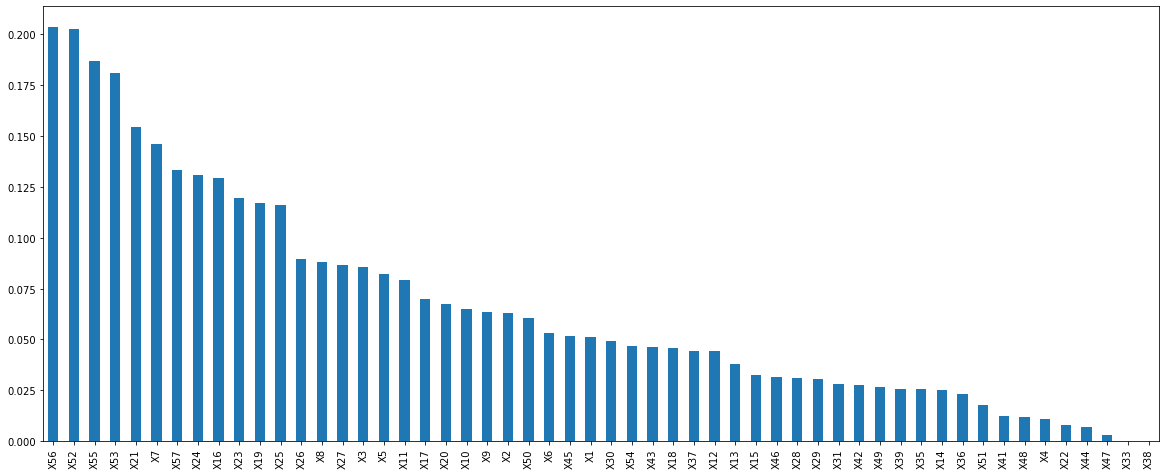

In [24]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [25]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3128, 54) (782, 54) (3128,) (782,)


In [26]:
#No we Will select the  top 15 important features
sel_15_cols = SelectKBest(mutual_info_classif, k=15)
sel_15_cols.fit(X_train, y_train)
cols=X_train.columns[sel_15_cols.get_support()]

In [27]:
cols

Index(['X5', 'X7', 'X16', 'X17', 'X19', 'X21', 'X23', 'X24', 'X25', 'X27',
       'X52', 'X53', 'X55', 'X56', 'X57'],
      dtype='object')

In [28]:
X_train=X_train[['X3', 'X5', 'X7', 'X16', 'X19', 'X21', 'X23', 'X24', 'X25', 'X27',
       'X52', 'X53', 'X55', 'X56', 'X57']]

In [29]:
X_test=X_test[['X3', 'X5', 'X7', 'X16', 'X19', 'X21', 'X23', 'X24', 'X25', 'X27',
       'X52', 'X53', 'X55', 'X56', 'X57']]

### Scaling the data

In [30]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Logistic Regression

In [31]:
lm=LogisticRegression()

lm.fit(X_train,y_train)

x_pred = lm.predict(X_train)

x_pred_prob=lm.predict_proba(X_train)
y_pred=lm.predict(X_test)


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       475
           1       0.90      0.79      0.84       307

    accuracy                           0.88       782
   macro avg       0.88      0.86      0.87       782
weighted avg       0.88      0.88      0.88       782



In [34]:
y_pred     = lm.predict(X_test)
y_pred_prob= lm.predict_proba(X_test)
print('Test Data Score : {0:.3f}'.format(lm.score(X_test, y_test)))

print('Accuracy : {0:.3f}'.format(mt.accuracy_score(y_test, y_pred)))

print('\nRecall : {0:.3f}'.format(mt.recall_score(y_test, y_pred)))
print('Precission : {0:.3f}'.format(mt.precision_score(y_test, y_pred)))

print('\nAUC : {0:.3f}'.format(mt.roc_auc_score(y_test, y_pred_prob[:,1]) ))
print('F-Beta Score : {0:.3f}'.format(mt.fbeta_score(y_test, y_pred, beta=2)))

Test Data Score : 0.881
Accuracy : 0.881

Recall : 0.788
Precission : 0.896

AUC : 0.953
F-Beta Score : 0.808


## Random Forest Classifier

In [35]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

x_pred = model.predict(X_train)

x_pred_prob=model.predict_proba(X_train)

y_pred=model.predict(X_test)

In [37]:
y_pred     = model.predict(X_test)
y_pred_prob= model.predict_proba(X_test)
print('Test Data Score : {0:.3f}'.format(model.score(X_test, y_test)))

print('Accuracy : {0:.3f}'.format(mt.accuracy_score(y_test, y_pred)))

print('\nRecall : {0:.3f}'.format(mt.recall_score(y_test, y_pred)))
print('Precission : {0:.3f}'.format(mt.precision_score(y_test, y_pred)))

print('\nAUC : {0:.3f}'.format(mt.roc_auc_score(y_test, y_pred_prob[:,1]) ))
print('F-Beta Score : {0:.3f}'.format(mt.fbeta_score(y_test, y_pred, beta=1)))

Test Data Score : 0.948
Accuracy : 0.948

Recall : 0.928
Precission : 0.938

AUC : 0.987
F-Beta Score : 0.933


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       475
           1       0.94      0.93      0.93       307

    accuracy                           0.95       782
   macro avg       0.95      0.94      0.94       782
weighted avg       0.95      0.95      0.95       782



In [49]:
cross_val_score(model, X_train,y_train,cv=10)

array([0.96485623, 0.93290735, 0.93610224, 0.96485623, 0.92971246,
       0.92332268, 0.9456869 , 0.94249201, 0.94871795, 0.94230769])

In [50]:
cross_val_score(model, X_test,y_test,cv=10)

array([0.92405063, 0.91139241, 0.94871795, 0.93589744, 0.96153846,
       0.96153846, 0.91025641, 0.93589744, 0.91025641, 0.88461538])

## XGB Classifier

In [39]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

x_pred3 = xgb.predict(X_train)
x_pred_prob3= xgb.predict_proba(X_train)
y_pred3 = xgb.predict(X_test)


[10:50:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda folder\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [40]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       475
           1       0.91      0.92      0.91       307

    accuracy                           0.93       782
   macro avg       0.93      0.93      0.93       782
weighted avg       0.93      0.93      0.93       782



In [42]:
y_pred3     = xgb.predict(X_test)
y_pred_prob3= xgb.predict_proba(X_test)
print('Test Data Score : {0:.3f}'.format(model.score(X_test, y_test)))

print('Accuracy : {0:.3f}'.format(mt.accuracy_score(y_test, y_pred3)))

print('\nRecall : {0:.3f}'.format(mt.recall_score(y_test, y_pred3)))
print('Precission : {0:.3f}'.format(mt.precision_score(y_test, y_pred3)))

print('\nAUC : {0:.3f}'.format(mt.roc_auc_score(y_test, y_pred_prob3[:,1]) ))
print('F-Beta Score : {0:.3f}'.format(mt.fbeta_score(y_test, y_pred3, beta=2)))

Test Data Score : 0.948
Accuracy : 0.932

Recall : 0.919
Precission : 0.910

AUC : 0.982
F-Beta Score : 0.917


# Test set 

In [98]:
test_data.head(2)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.7,0.0,0.70,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.000,0.0,0.105,0.000,0.0,2.342,47,89
1,1,0.0,0.0,0.84,0.0,0.84,0.0,0.84,0.0,0.0,...,0.0,0.0,0.388,0.0,0.776,0.129,0.0,10.375,168,249


In [99]:
test_data= test_data.drop('Unnamed: 0', axis=1)

In [102]:
test_data=test_data[['X3', 'X5', 'X7', 'X16', 'X19', 'X21', 'X23', 'X24', 'X25', 'X27',
       'X52', 'X53', 'X55', 'X56', 'X57']]

In [103]:
test_data= scaler.fit_transform(test_data)

### Final predictions on test set

In [104]:
test_data_pred = pd.DataFrame(model.predict(test_data), columns=['pred'])

In [105]:
test_data_pred.to_csv('test_data_pred.csv',index=False)

In [107]:
test_data_pred.value_counts()

pred
0       479
1       212
dtype: int64

### Model predictions for the test dataset

In [108]:
test_data_pred

,pred
0,0
1,1
2,1
3,1
4,1
...,...
686,0
687,0
688,0
689,0
